<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Sabrina! Congratulations on submitting another project! 🎉  I will be using the standard color marking. 
   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. You have successfully analyzed the distributions and wrote conclusions in the EDA section, normalized the `review` column, employed advanced techniques such as lemmatization and vectorizing, trained multiple models including a dummy baseline, and applied the `evaluate_model()` method for their assessment. Great job! The results look very good.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 

        
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, great job! 

</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for such an excellent job! You showed strong coding skills and a solid understanding of this topic, which is quite hard. I hope you enjoyed working on this project. You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. The models were trained and evaluated correctly. Please do not worry about Bert, we indeed do not need to run it here. 
    
I've left several comments, but I do not have any questions, so the project is accepted. 




Congratulations and good luck! 
    
<hr> 
    
✍️ If you are interested in Large Language Models, check out [Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g) and [Tokenization lecture](https://www.youtube.com/watch?v=zduSFxRajkE) by Andrej Karpathy, one of the leading scientists in this area.  He has also recently published a nice [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI) tutorial where he explains all LLM preparation stages and a very useful video about how he uses LLM [here](https://www.youtube.com/watch?v=EWvNQjAaOHw&feature=youtu.be). This is a comprehensive guide on how to choose the optimal tool for your tasks while saving time and money.
 
    
    
I would also like to recommend this new <font color='purple'>**Language Modeling from Scratch Spring 2025 class by Stanford**</font>. This class has just started. There are three links: [Recorded lectures on Youtube](https://www.youtube.com/playlist?list=PLoROMvodv4rOY23Y0BoGoBGgQ1zmU_MT_), [course website](https://stanford-cs336.github.io/spring2025/), and the [GitHub repository with assignments and jupyter notebooks](https://github.com/stanford-cs336). This course is up-to-date, so the information there is super relevant today.

    
    
By the way, Hugging Face has a good free [NLP course](https://huggingface.co/learn/nlp-course/en/chapter0/1).
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
        
    
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

# "Sentiment Decoded: Predicting Movie Review Polarity with Text Classification"

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [4]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [6]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's a very useful thing, by the way.     
</div>

## Load Data

In [7]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [8]:
# Overview data
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [9]:
# View data
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

We can also look for the duplicates add some conclusion here. 

</div>

## EDA

Let's check the number of movies and reviews over years.

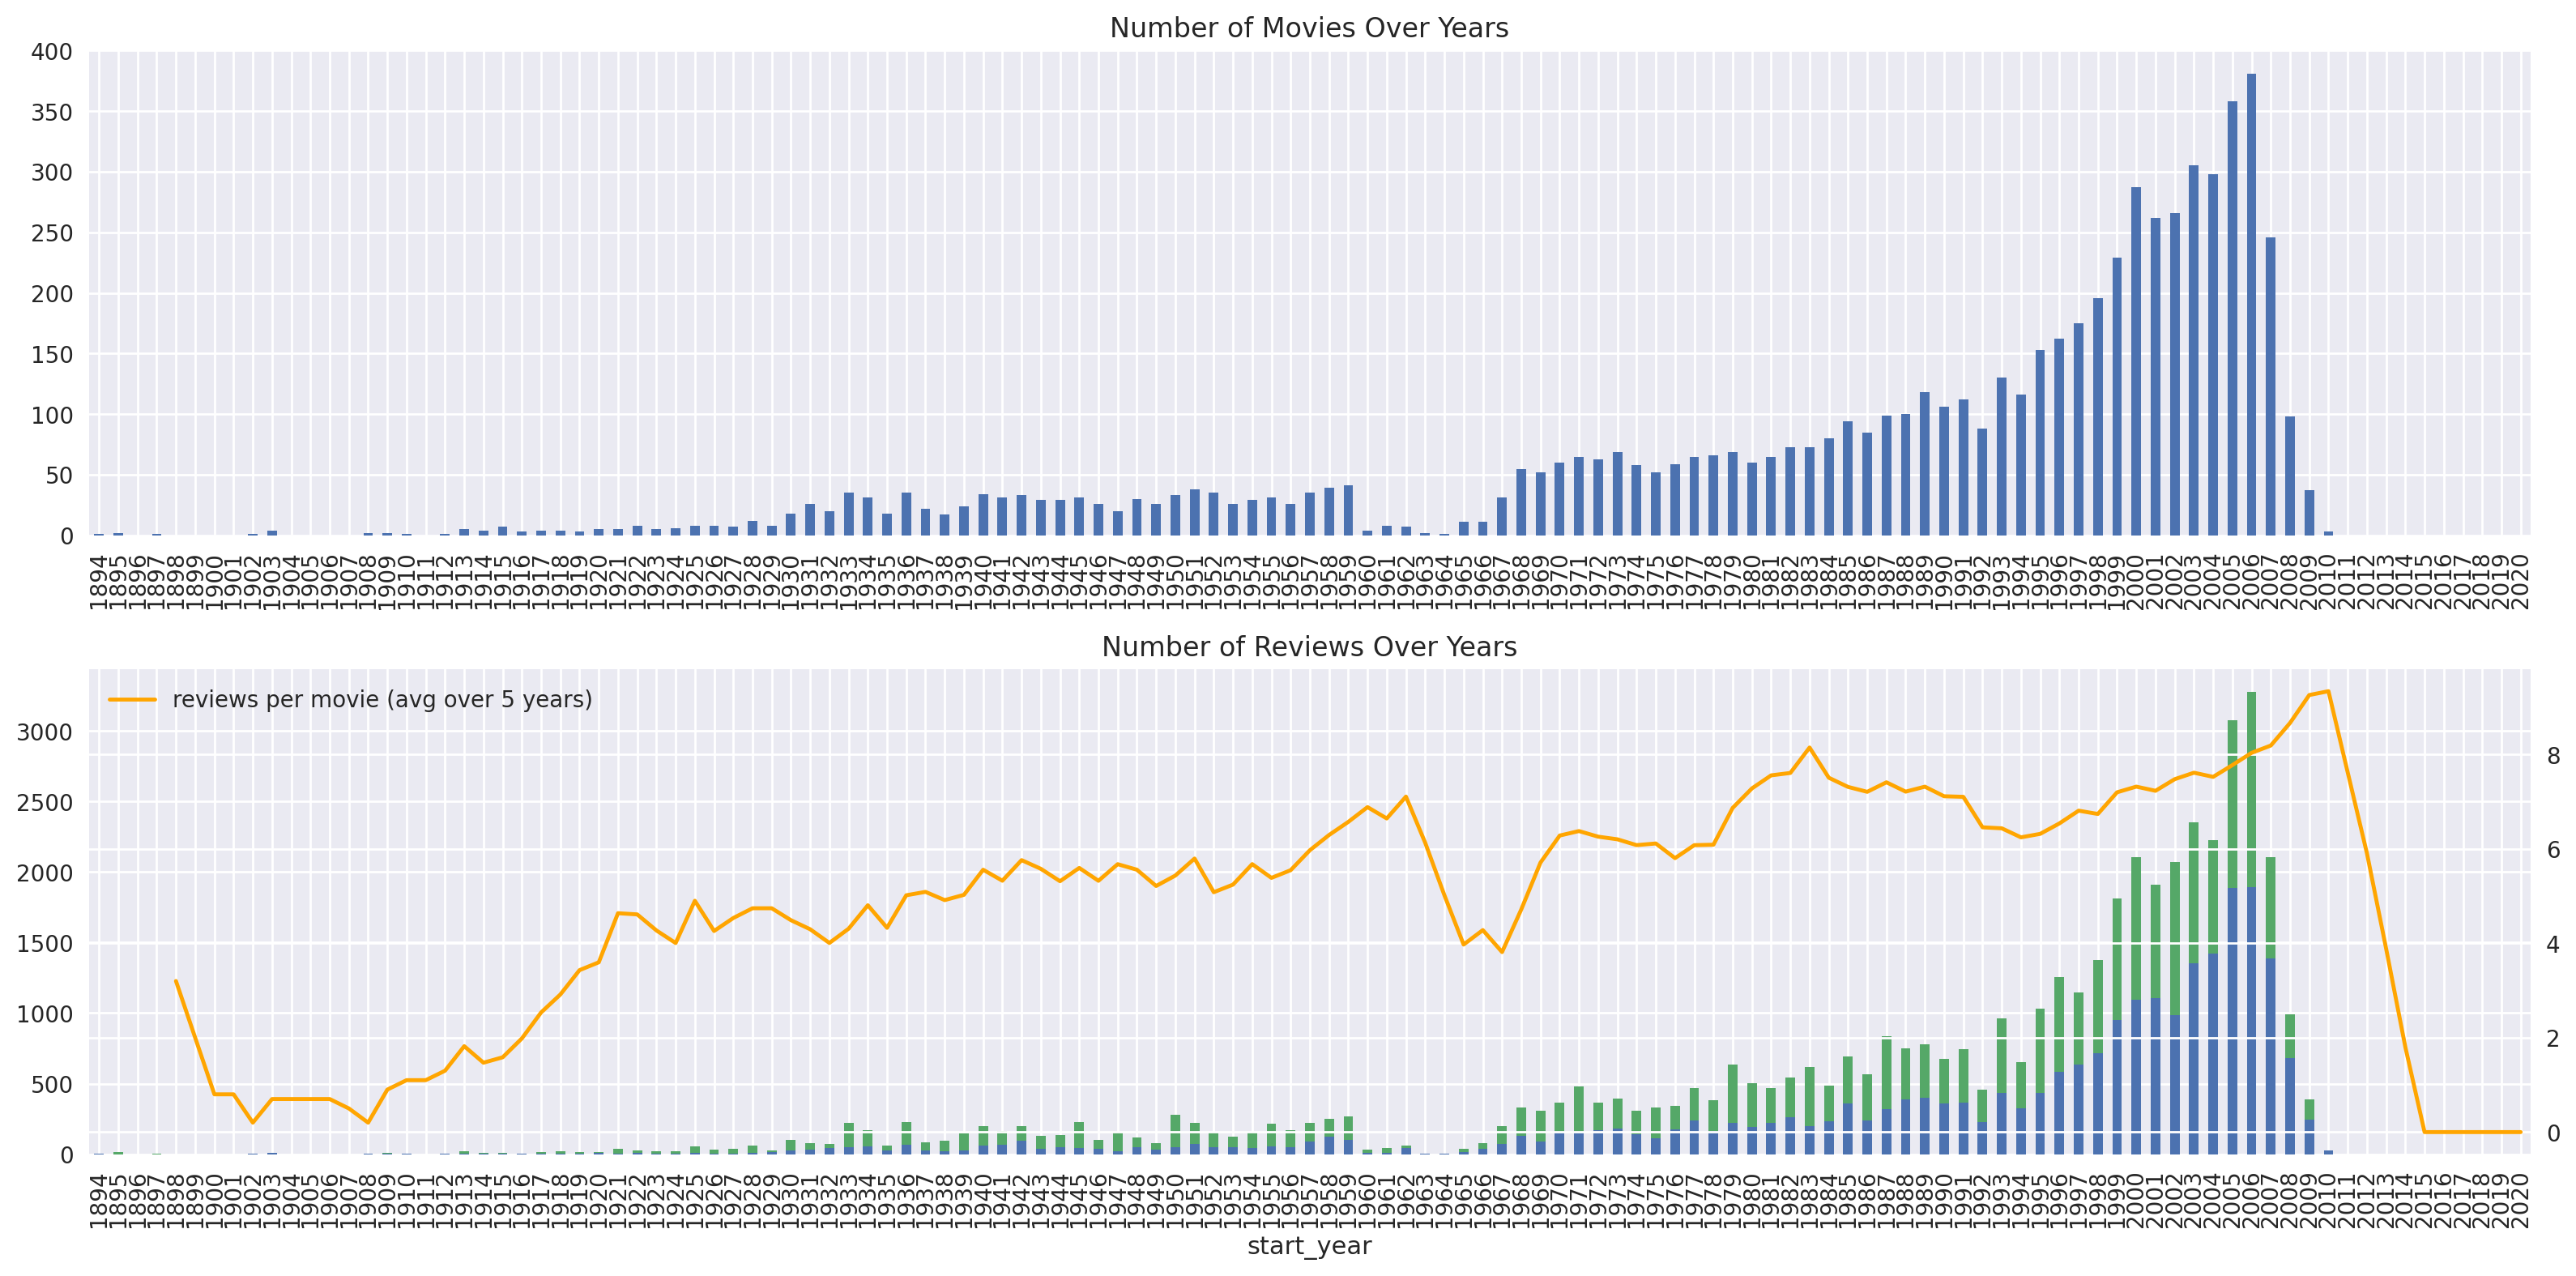

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

There are clearly more movies than reviews. Reviews increase by 1996 which could be influenced by the rise of the internet making it easier to write reviews on platforms. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
So we can see a steady increase in the number of movies. The average number of reviews also increases.

</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

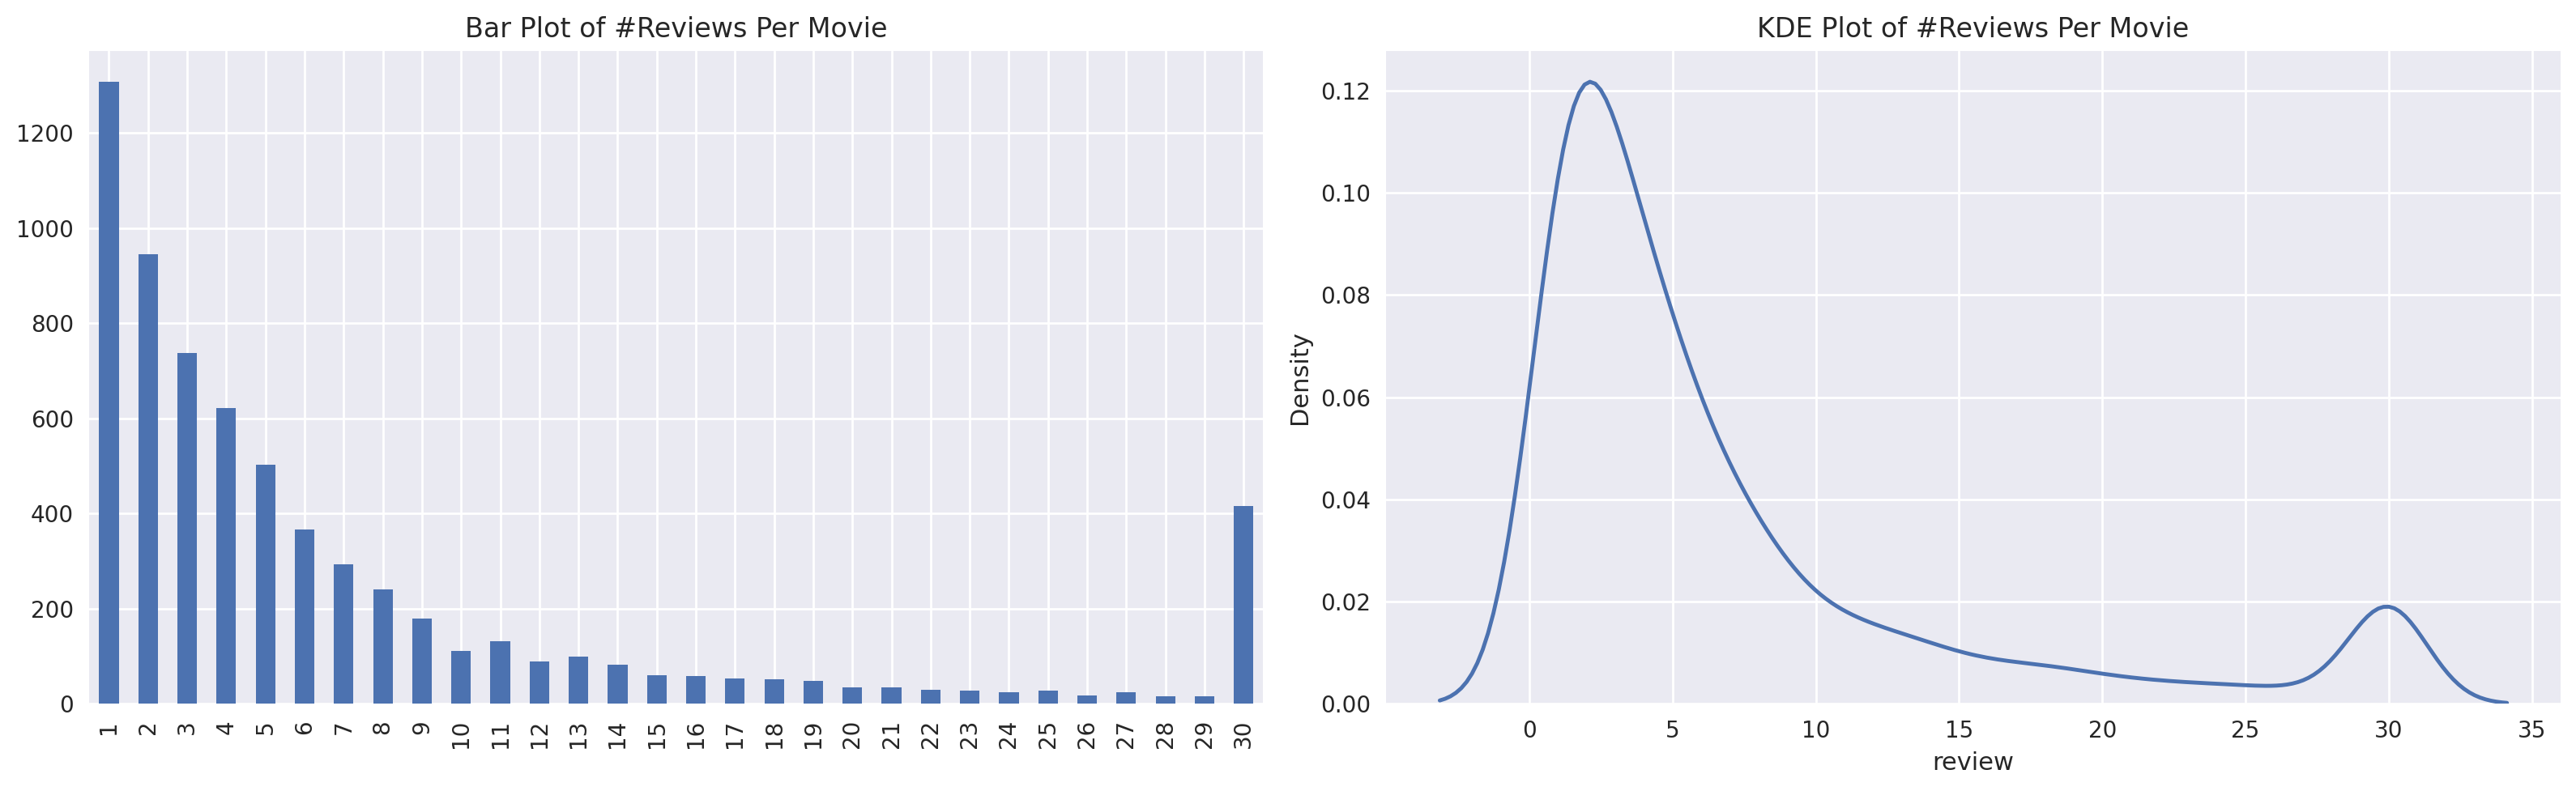

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

Most movies have between 1-5 reviews. There is an outlier group of movies with 30 reviews.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Correct.
</div>

In [12]:
# Find how many movies are reviews total
df_reviews['tconst'].nunique()

6648

In [13]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

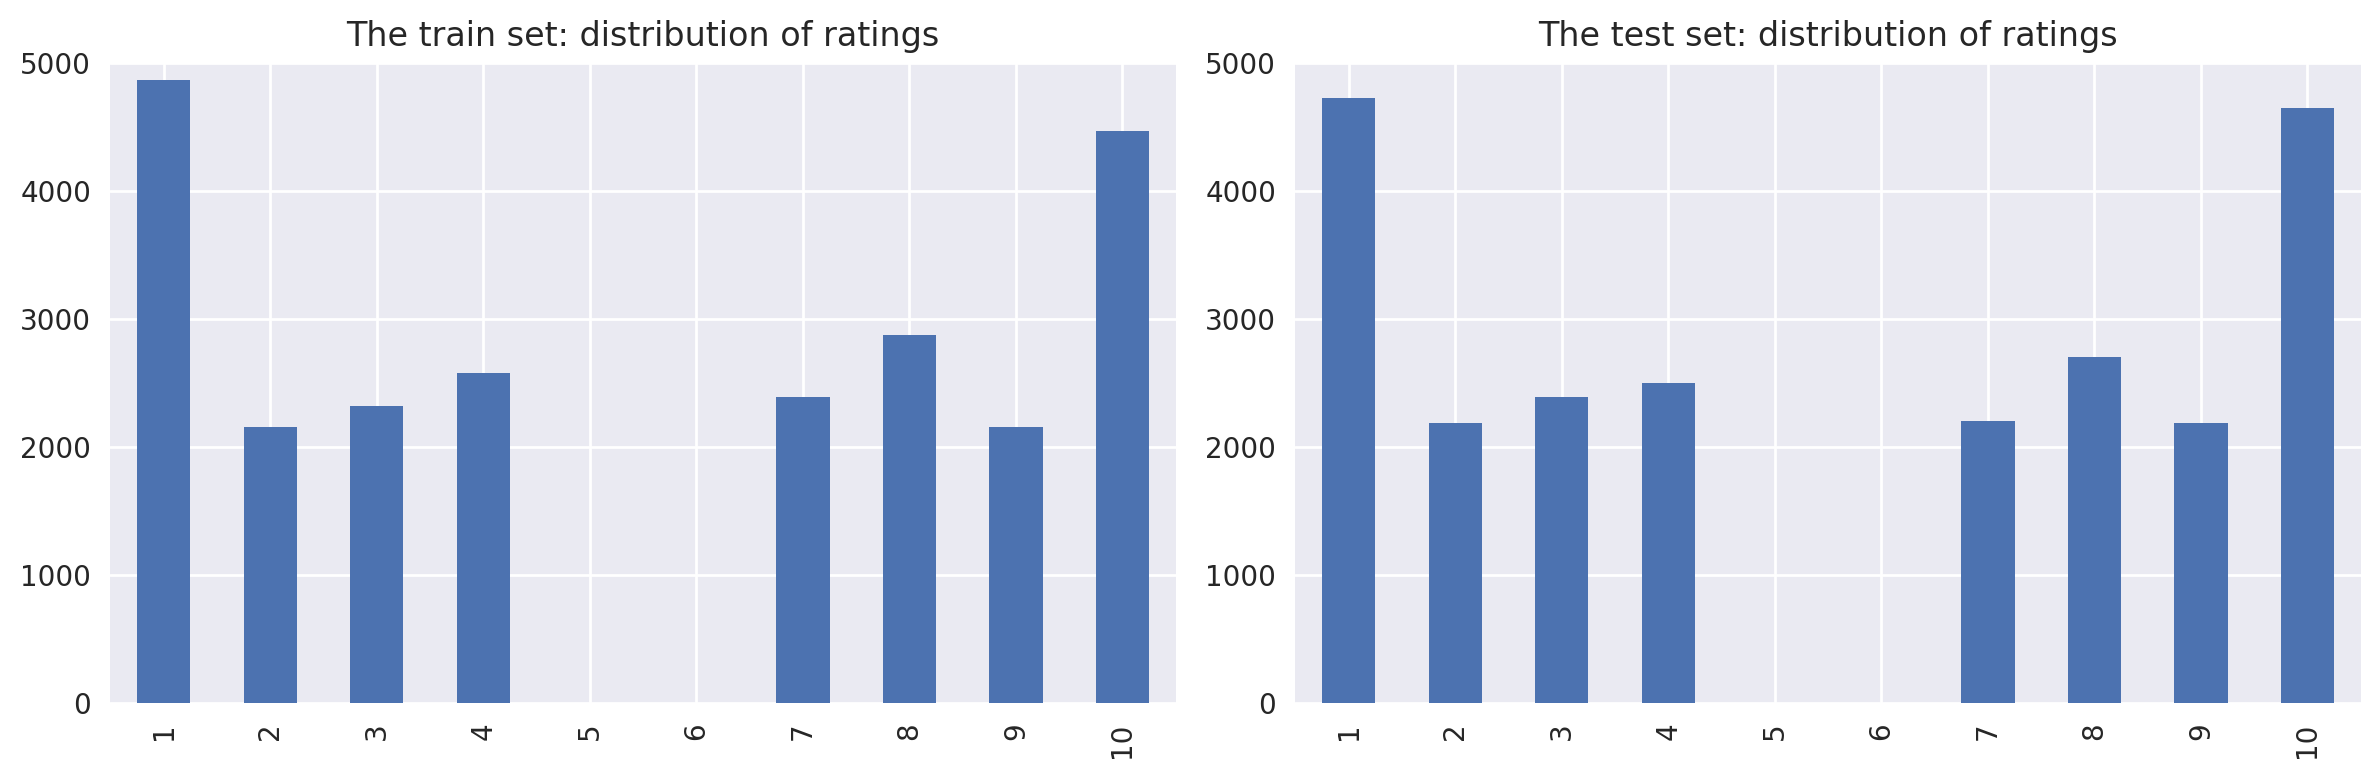

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

The distribution of ratings in the train and test set look to be pretty well-balanced.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Yes, the distrbutions of the training and test sets are quite similar. 

</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


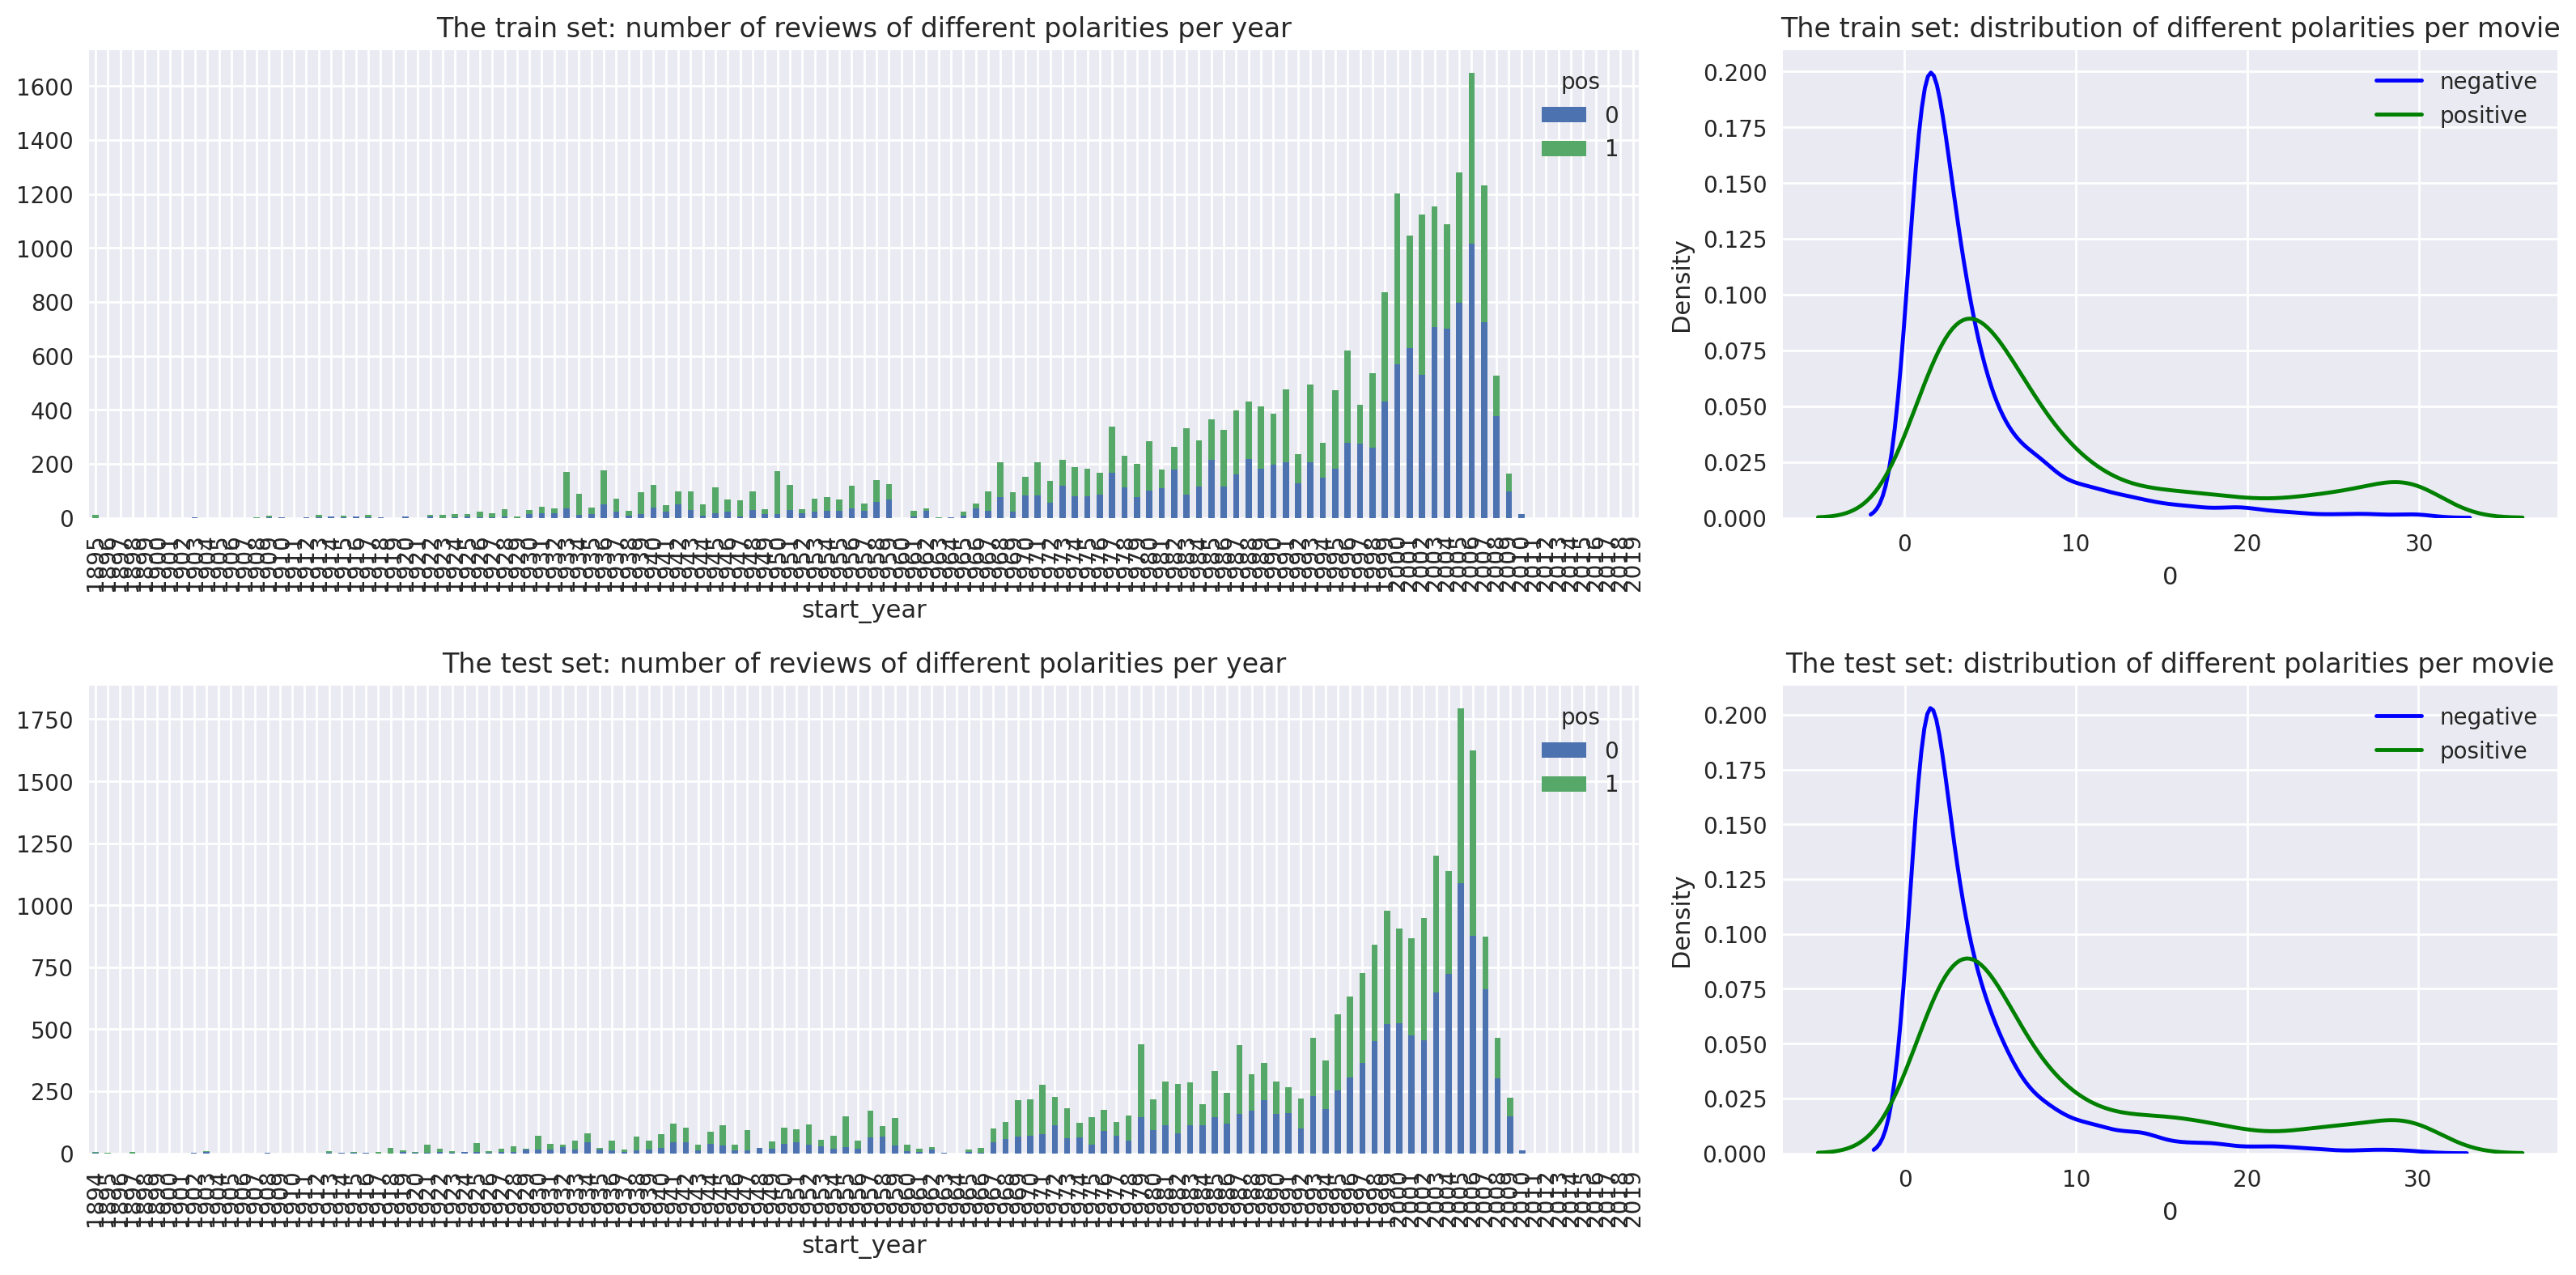

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

Once a again the train and test set look very similar in distribution.

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [16]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that the **type** veriable is green in the function above. When you see that your variables are green, you should think of another name, since green color indicates that this name is reserved in python. 
    
    
I know it was in the precode, but it is a great opportunity to point out this thing. 
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [17]:
import re
import string

# Converts texts to lowercase, removes punctuations and digits
df_reviews['review_norm'] = df_reviews['review'].apply(
    lambda x: re.sub(r'\d+', '', re.sub(f'[{re.escape(string.punctuation)}]', '', x.lower()))
)

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice code!     
</div>

In [18]:
# Check changes applied
df_reviews['review_norm'].head()

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made presenting...
2    there is no real story the film seems more lik...
3    um  a serious film about troubled teens in sin...
4    im totally agree with garryjohal from singapor...
Name: review_norm, dtype: object

In [19]:
# Compare to original
df_reviews['review'].head()

0    The pakage implies that Warren Beatty and Gold...
1    How the hell did they get this made?! Presenti...
2    There is no real story the film seems more lik...
3    Um .... a serious film about troubled teens in...
4    I'm totally agree with GarryJohal from Singapo...
Name: review, dtype: object

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [20]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

### Model 0 - Constant

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Create the dummy classifier using 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy='most_frequent')

In [23]:
# Fit on the training data
dummy_clf.fit(df_reviews_train['review_norm'], train_target)

DummyClassifier(strategy='most_frequent')

In [24]:
# Predict on the test set
dummy_preds = dummy_clf.predict(df_reviews_test['review_norm'])

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


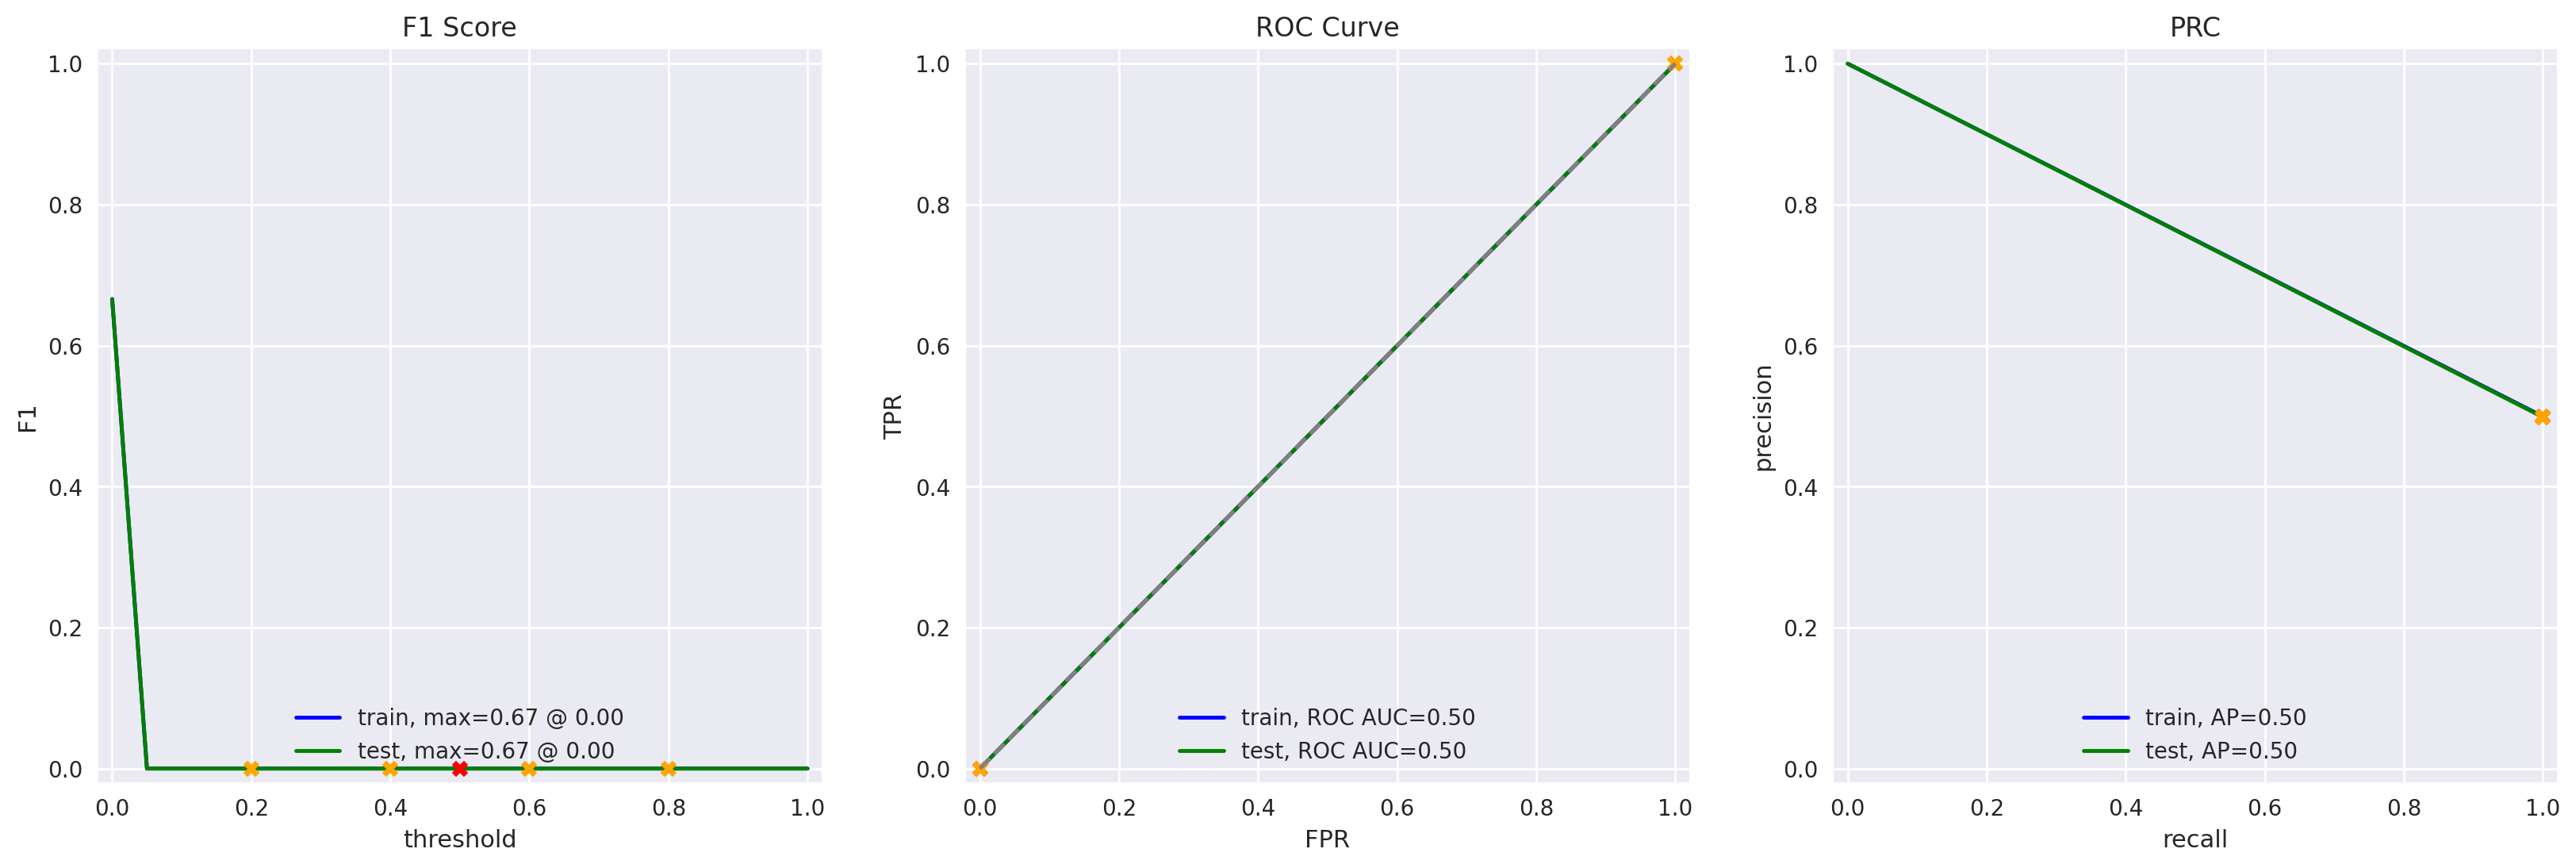

In [62]:
#Evaluate the model using the evaluate model function
evaluate_model(dummy_clf, df_reviews_train, train_target, df_reviews_test, test_target)

The constant model's accuracy is 50% on both the training and test sets, which simply mirrors the balanced distribution of positive and negative labels in the dataset. However, its F1 score is 0.0, meaning it completely failed to identify any of the positive cases. It only predicted one class, ignoring the other entirely, which leads to zero precision and recall for the positive class.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Good. You can also check the result using different strategy values.
</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [26]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

from nltk.corpus import stopwords

In [27]:
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
tf_idf = count_tf_idf.fit_transform(df_reviews['review_norm'])

In [28]:
# Define pipeline
model_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(random_state=42))
])

# Define parameter grid
param_grid1 = {
    'tfidf__max_features': [100, 300],
    'tfidf__min_df': [3, 5],
    'tfidf__max_df': [0.7, 0.8],
    'logreg__C': [0.1, 1.0, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']  # dynamic solver tuning
}

# Set scoring to F1
f1_scorer = make_scorer(f1_score)

# Grid search
grid_search1 = GridSearchCV(
    model_1,
    param_grid1,
    scoring=f1_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search1.fit(df_reviews_train['review_norm'], train_target)

# Best model
best_model_1 = grid_search1.best_estimator_

print("Best Parameters:\n", grid_search1.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters:
 {'logreg__C': 1.0, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'tfidf__max_df': 0.7, 'tfidf__max_features': 300, 'tfidf__min_df': 3}


In [29]:
# Train the model
best_model_1.fit(df_reviews_train['review_norm'], train_target)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, max_features=300, min_df=3)),
                ('logreg',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [30]:
# Transform features for evaluation
train_features_1 = best_model_1.named_steps['tfidf'].transform(df_reviews_train['review_norm'])
test_features_1 = best_model_1.named_steps['tfidf'].transform(df_reviews_test['review_norm'])

          train  test
Accuracy   0.81  0.80
F1         0.81  0.80
APS        0.88  0.88
ROC AUC    0.89  0.88


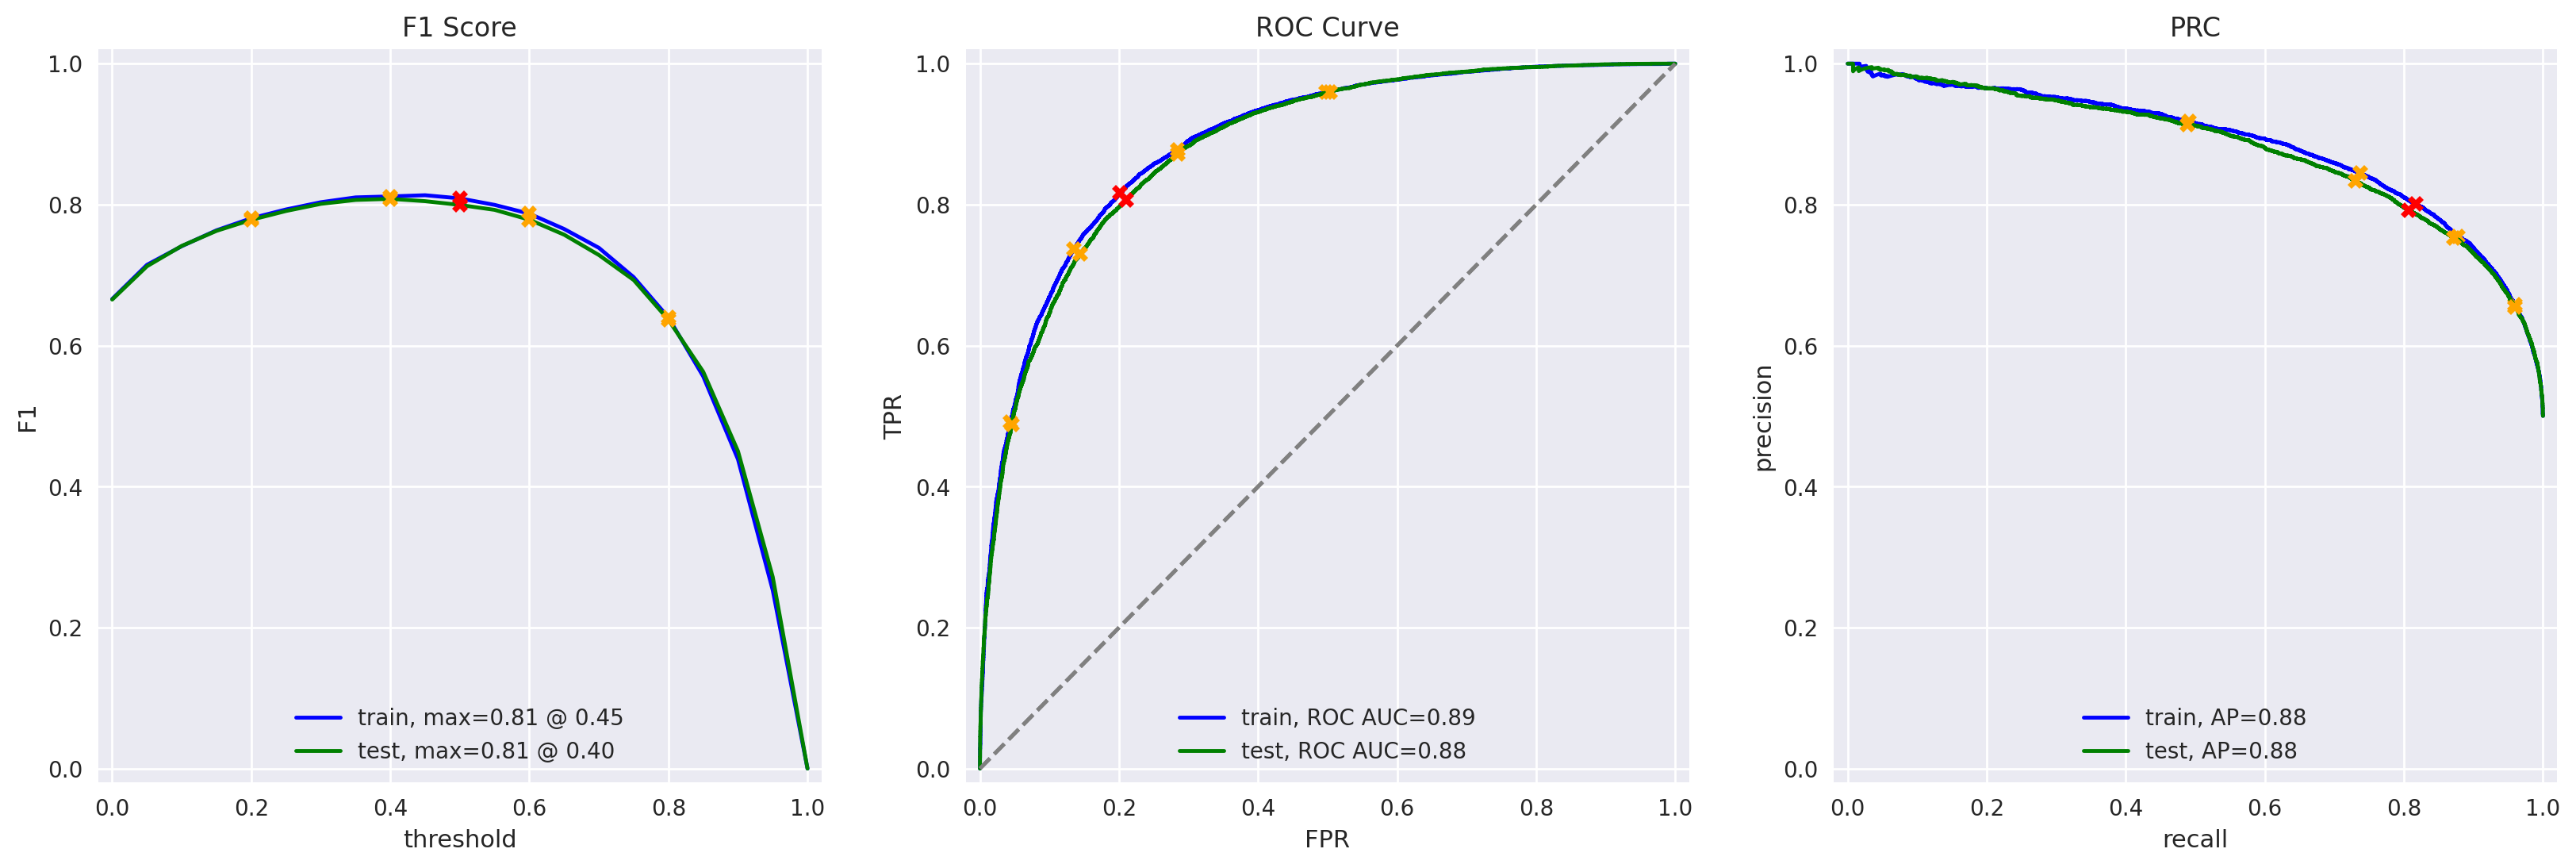

In [31]:
evaluate_model(best_model_1.named_steps['logreg'], train_features_1, train_target, test_features_1, test_target)

The model achieves 81% accuracy on the training data and 80% on the test data, which suggests it generalizes well without overfitting. The F1 scores match the accuracy closely—both sitting at 0.81 and 0.80—indicating that precision and recall are well-balanced. However, it falls short of the required F1 score of .85.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    

    
You can also try the default parameters as well. Such a model may perform even better sometimes. 

</div>

### Model 2 - spaCy, TF-IDF and LR

In [32]:
import spacy
from sklearn.model_selection import GridSearchCV

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [33]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    #tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [34]:
df_reviews['review_norm'] = df_reviews['review'].apply(text_preprocessing_3)

In [35]:
# Define pipeline
model_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(random_state=42))
])

# Define parameter grid
param_grid2 = {
    'tfidf__max_features': [500, 800],
    'tfidf__min_df': [1, 3],
    'tfidf__max_df': [0.7, 0.8],
    'logreg__C': [0.1, 1.0],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']  # dynamic solver tuning
}

# Set scoring to F1
f1_scorer = make_scorer(f1_score)

# Grid search
grid_search2 = GridSearchCV(
    model_2,
    param_grid2,
    scoring=f1_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search2.fit(df_reviews_train['review_norm'], train_target)

# Best model
best_model_2 = grid_search2.best_estimator_

print("Best Parameters:\n", grid_search2.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters:
 {'logreg__C': 1.0, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'tfidf__max_df': 0.7, 'tfidf__max_features': 800, 'tfidf__min_df': 1}


In [36]:
# Train the model
best_model_2.fit(df_reviews_train['review_norm'], train_target)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7, max_features=800)),
                ('logreg',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [37]:
# Transform features
train_features_2 = best_model_2.named_steps['tfidf'].transform(df_reviews_train['review_norm'])
test_features_2 = best_model_2.named_steps['tfidf'].transform(df_reviews_test['review_norm'])

          train  test
Accuracy   0.87  0.86
F1         0.87  0.86
APS        0.94  0.93
ROC AUC    0.94  0.93


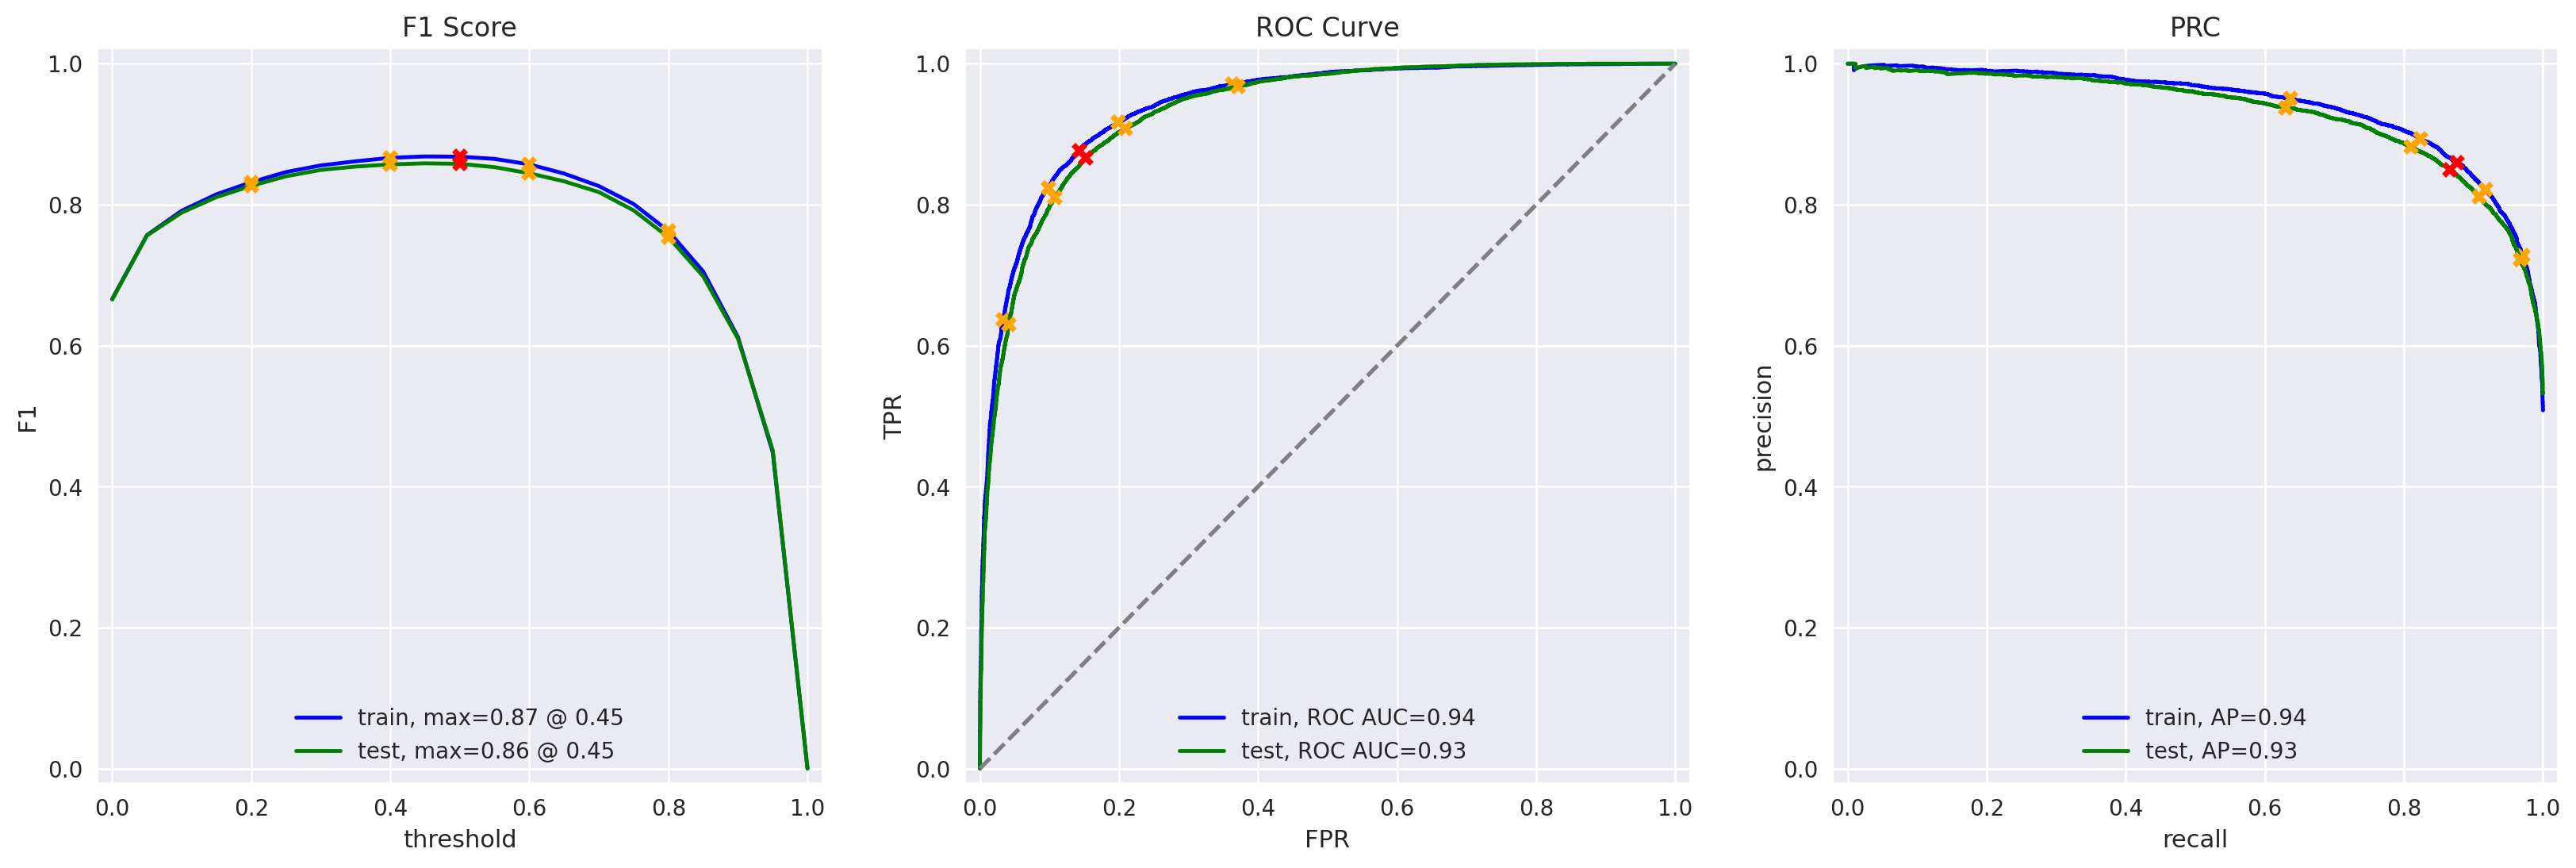

In [38]:
# Run evaluation
evaluate_model(best_model_2.named_steps['logreg'], train_features_2, train_target, test_features_2, test_target)

The accuracy is 87% on the training set and 86% on the test set, suggesting that the model generalizes well and is not overfitting.
The F1 score is equally strong—0.87 for training and 0.86 for testing—which means the model balances precision and recall very effectively. It’s not only getting predictions right, but it's doing so in a way that minimizes both false positives and false negatives. The train and test set meet out required F1 score.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
We see quite similar performance. 
    
</div>

### Model 3 - spaCy, TF-IDF and LGBMClassifier

In [39]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV


In [40]:
# Build pipeline with TF-IDF + LightGBM
model_3 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100, min_df=5, max_df=0.8)),
    ('lgbm', LGBMClassifier(random_state=42))
])

In [41]:
# Define the parameter space
param_dist = {
    'lgbm__n_estimators': [200, 300],
    'lgbm__learning_rate': [0.05, 0.1],
    'lgbm__num_leaves': [31, 50],
    'lgbm__max_depth': [-1, 10, 20],
    'lgbm__min_child_samples': [10, 20],
    'lgbm__subsample': [0.8, 1.0],
    'lgbm__colsample_bytree': [0.6, 0.8]
}

# Use F1 score for optimization
scorer = make_scorer(f1_score)

# Randomized search
search = RandomizedSearchCV(
    estimator=model_3,
    param_distributions=param_dist,
    n_iter=20,  # Number of combinations to try
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit to training data
search.fit(df_reviews_train['review_norm'], train_target)

# Best model
best_model3 = search.best_estimator_

print("Best Parameters:\n", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
 {'lgbm__subsample': 0.8, 'lgbm__num_leaves': 50, 'lgbm__n_estimators': 300, 'lgbm__min_child_samples': 20, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.6}
[CV] END lgbm__colsample_bytree=0.6, lgbm__learning_rate=0.05, lgbm__max_depth=20, lgbm__min_child_samples=20, lgbm__n_estimators=300, lgbm__num_leaves=31, lgbm__subsample=1.0; total time=   6.1s
[CV] END lgbm__colsample_bytree=0.6, lgbm__learning_rate=0.05, lgbm__max_depth=20, lgbm__min_child_samples=20, lgbm__n_estimators=300, lgbm__num_leaves=31, lgbm__subsample=1.0; total time=   5.9s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.05, lgbm__max_depth=20, lgbm__min_child_samples=20, lgbm__n_estimators=200, lgbm__num_leaves=31, lgbm__subsample=0.8; total time=   4.8s
[CV] END lgbm__colsample_bytree=0.6, lgbm__learning_rate=0.1, lgbm__max_depth=10, lgbm__min_child_samples=20, lgbm__n_estimators=300, lgbm__num

In [42]:
# Transform features for evaluation
train_features_3 = best_model3.named_steps['tfidf'].transform(df_reviews_train['review_norm'])
test_features_3 = best_model3.named_steps['tfidf'].transform(df_reviews_test['review_norm'])

          train  test
Accuracy   0.90  0.73
F1         0.90  0.73
APS        0.96  0.80
ROC AUC    0.96  0.81


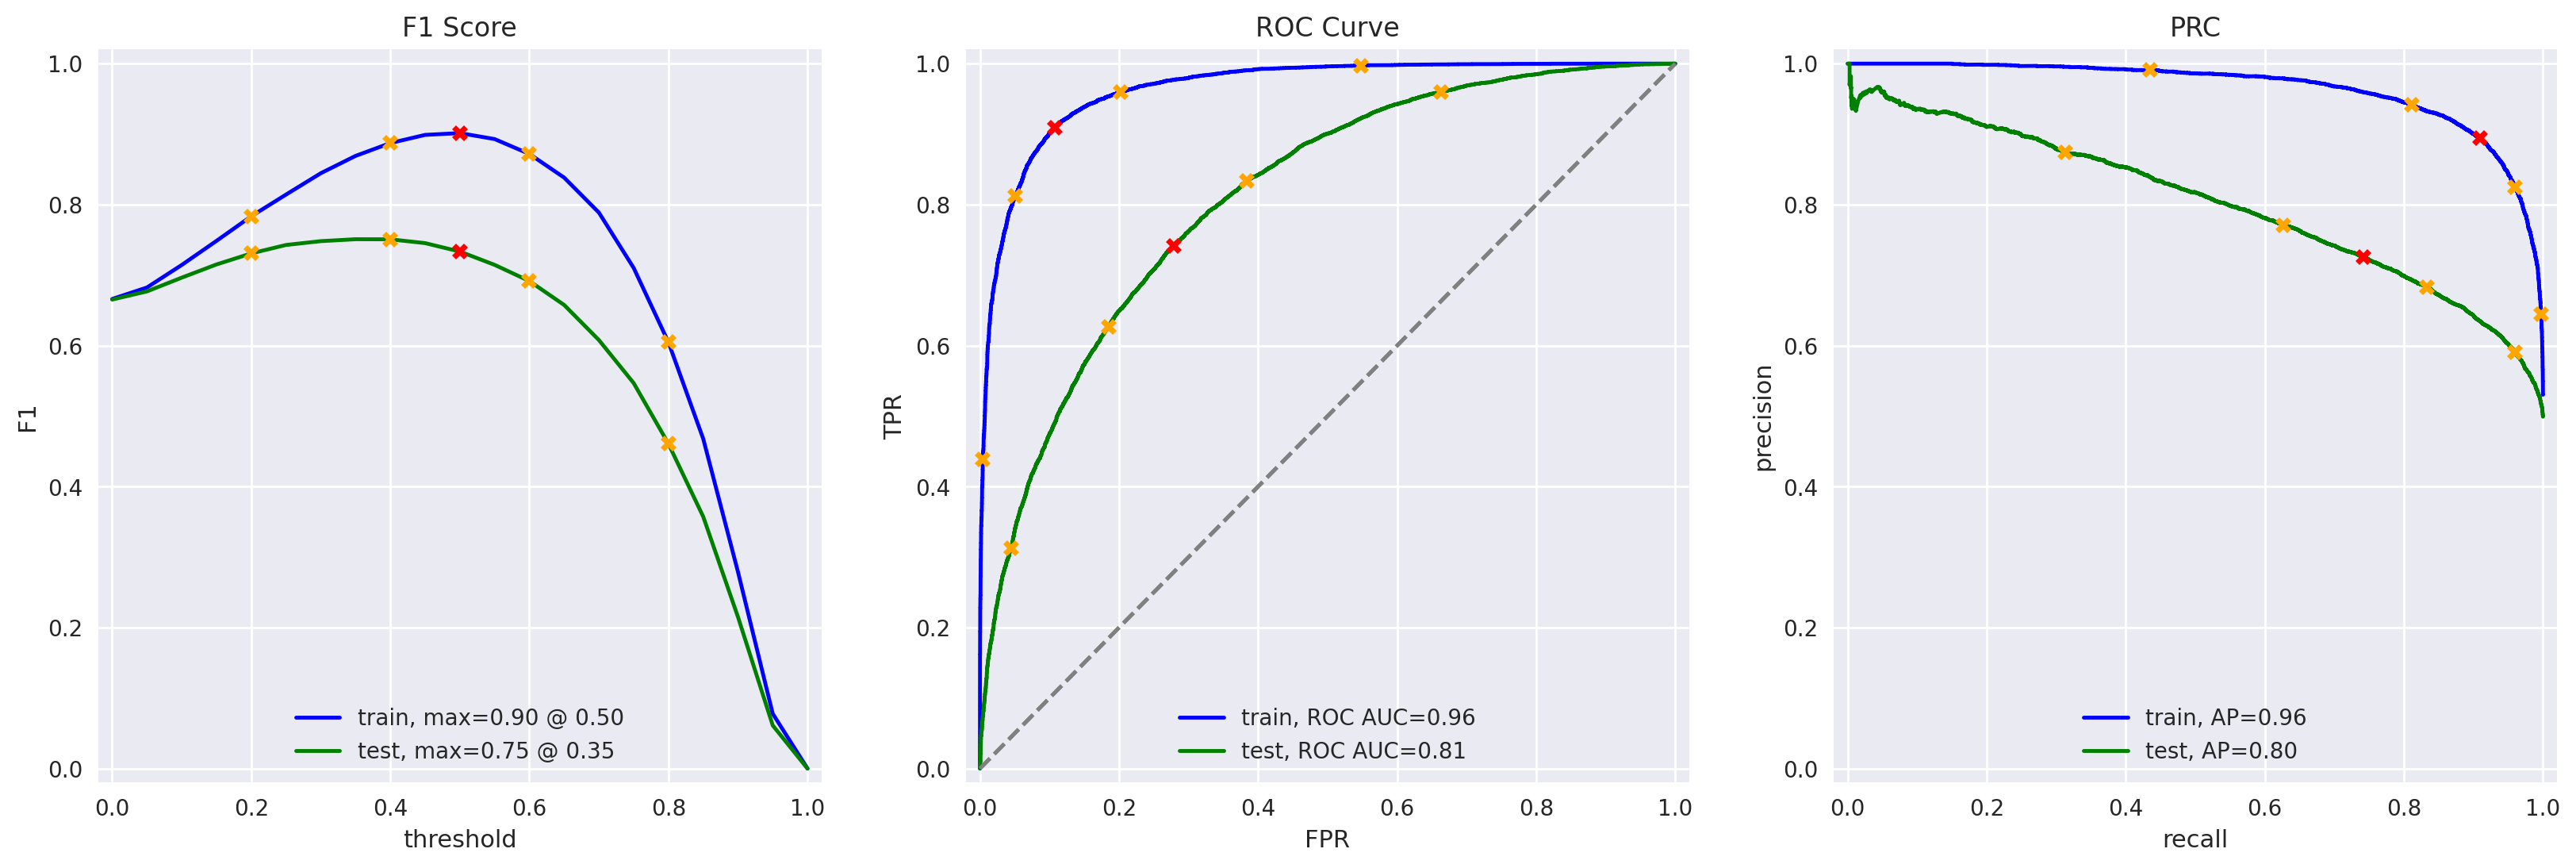

In [43]:
# Run evaluation
evaluate_model(best_model3.named_steps['lgbm'], train_features_3, train_target, test_features_3, test_target)

On the training set, the model performs extremely well: 90% accuracy, 0.90 F1 score, and near-perfect ROC AUC and average precision scores of 0.96. However, when evaluated on the test set, performance drops noticeably. Accuracy falls to 73%, and the F1 score also drops to 0.73. The ROC AUC dips to 0.81, and the average precision score falls to 0.80. While these test scores are still decent, the sharp decline from the training metrics suggests the model may have memorized the training data rather than learning generalizable patterns.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Good. 
    
</div>


###  Model 9 - BERT (not used)

In [44]:
#import torch
#import transformers

In [45]:
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
#config = transformers.BertConfig.from_pretrained('bert-base-uncased')
#model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [46]:
#def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
 #   ids_list = []
 #   attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    # <put your code here to create ids_list and attention_mask_list>
    
  #  if force_device is not None:
   #     device = torch.device(force_device)
    #else:
     #   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    #model.to(device)
    #if not disable_progress_bar:
     #   print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    #embeddings = []

    #for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
     #   ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <put your code here to create attention_mask_batch
            
      #  with torch.no_grad():            
       #     model.eval()
        #    batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        #embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    #return np.concatenate(embeddings)

In [47]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
#train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [48]:
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target.shape)

In [49]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, Bert is a hard thing to handle, so we should use GPU for it. By the way, you can use Colab for your practice tasks. It has some free GPU.

</div>

## My Reviews

In [50]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(
    lambda x: re.sub(r'\d+', '', re.sub(f'[{re.escape(string.punctuation)}]', '', x.lower()))
)

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i reall...


### Model 1

In [63]:
texts = my_reviews['review_norm']

# how positive is each review
my_reviews_pred_prob = best_model_1.predict_proba(texts)[:, 1]

# print the likelihood of it being positive
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.34:  i did not simply like it not my kind of movie
0.86:  well i was bored and felt asleep in the middle of the movie
0.40:  i was really fascinated with the movie
0.13:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.45:  i didnt expect the reboot to be so good writers really cared about the source material
0.83:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.44:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.47:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


Model 1 appears to be doing a solid job overall. It's assigning sentiment probabilities that mostly make sense based on the tone of each review.

For example, the review saying "i did not simply like it not my kind of movie" received a low score of 0.34, which aligns well with its negative sentiment. Another comment, "even the actors looked really old and disinterested," also received a low score of 0.13—again, an appropriate prediction. On the other hand, there are a few questionable results, such as the review "well i was bored and fell asleep in the middle of the movie" being scored at 0.86, which is high for a clearly negative statement. Similarly, "i was really fascinated with the movie" scored just 0.40, which seems too low for something positive.

Most predictions make sense, especially when the sentiment is obvious, but the model seems to struggle a bit with subtler or mixed reviews. Despite that, the model is generally effective and makes meaningful predictions, though it might improve with more refined text processing or additional training.

### Model 2

In [59]:
texts_spaCy = my_reviews['review_norm'].apply(text_preprocessing_3)

my_reviews_pred_prob = best_model_2.predict_proba(texts_spaCy)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.27:  i did not simply like it not my kind of movie
0.57:  well i was bored and felt asleep in the middle of the movie
0.48:  i was really fascinated with the movie
0.26:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.15:  i didnt expect the reboot to be so good writers really cared about the source material
0.50:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.01:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.85:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


Overall, it's doing a better job at interpreting the emotional tone of each review, though there's still room for refinement.

For example, it gives a low score of 0.27 to the review "i did not simply like it not my kind of movie," which is fitting for a clearly negative sentiment. It assigns 0.01 to "what a rotten attempt at a comedy," which is an excellent and confident prediction for a very negative comment. Likewise, a strongly positive statement like "launching on netflix was a brave move i really appreciate being able to binge" gets a high score of 0.85, which is appropriate.

That said, there are still some borderline or slightly confusing predictions. For instance, "well i was bored and fell asleep in the middle of the movie" received 0.57, which leans positive despite being a negative review. Similarly, "i was really fascinated with the movie" only received 0.48, which is just under neutral—possibly underestimating its positivity.

In short, Model 2 is handling most sentiment predictions correctly, especially when the sentiment is clearly strong in one direction. It seems slightly more cautious or uncertain when the tone is subtle or mixed, but overall, it's producing more realistic, well-calibrated probabilities than Model 1. It's a solid performer that reflects both the benefit of spaCy preprocessing and potentially better training or tuning.

### Model 3

In [61]:
my_reviews_pred_prob = best_model3.predict_proba(texts_spaCy)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.65:  i did not simply like it not my kind of movie
0.70:  well i was bored and felt asleep in the middle of the movie
0.70:  i was really fascinated with the movie
0.57:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.77:  i didnt expect the reboot to be so good writers really cared about the source material
0.65:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.80:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.70:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


Model 3 appears to have struggled with interpreting sentiment correctly. It assigns fairly high positive sentiment probabilities to reviews that are clearly negative, which suggests that it may be overgeneralizing.

For example, the review "i did not simply like it not my kind of movie" received a score of 0.65, which implies moderate positivity despite the negative wording. Similarly, "well i was bored and fell asleep in the middle of the movie" was scored at 0.70, and "what a rotten attempt at a comedy..." was scored 0.80—both of which are clearly misclassified as overly positive.

On the other hand, it gave 0.70 to a genuinely positive review ("i was really fascinated with the movie") and 0.70 to "launching on netflix was a brave move..."—so it's not entirely off track. But the problem is that it's not making clear distinctions between positive and negative tone. Even overtly critical reviews are receiving scores above 0.5, which is the usual decision threshold.

Overall, Model 3 seems to be consistently overestimating positivity, leading to confusion between genuinely positive and negative reviews. This could be due to the overfitting we experienced when measuring its F1 score during training. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice results! 

</div>

### Model 9 (not used)

In [ ]:
#texts = my_reviews['review_norm']

#my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

#for i, review in enumerate(texts.str.slice(0, 100)):
#    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusion

The goal of this project was to develop a model that accurately classifies movie reviews as positive or negative based on their text content. We explored three different modeling approaches that combined various preprocessing and classification techniques, including NLTK-based normalization, spaCy lemmatization, TF-IDF vectorization, and two classifiers: Logistic Regression and LightGBM.

Model 1, which used NLTK-style normalization, TF-IDF, and Logistic Regression, delivered strong and balanced results. It achieved 80–81% accuracy and F1 scores across both training and test sets, with ROC AUC and average precision scores near 0.88–0.89. It demonstrated consistent performance, handled sentiment predictions reasonably well, and offered a solid baseline.

Model 2 enhanced the pipeline by incorporating spaCy for more advanced linguistic preprocessing. This model outperformed the first, achieving 86–87% across most metrics, including ROC AUC and APS scores above 0.93. Its predictions were both accurate and well-calibrated, reflecting a better understanding of sentiment nuances, especially in clear positive and negative examples. It showed the best generalization and interpretability, making it the strongest candidate for deployment.

Model 3, which used spaCy and TF-IDF with the LGBM classifier, showed excellent performance on the training data but suffered a notable drop on the test set. While its training metrics were near perfect, the test accuracy fell to 73%, and its F1 and APS scores dropped significantly. Additionally, qualitative review of predictions revealed that the model often misclassified clearly negative reviews as positive. These results point to overfitting and a lack of generalization.

In summary, Model 2 emerged as the best-performing and most reliable model, balancing high accuracy with robustness and interpretability. Its use of spaCy preprocessing provided a meaningful improvement over simpler normalization, and Logistic Regression remained a dependable classifier. For real-world applications where balanced predictions and consistent behavior on unseen data are critical, Model 2 is the recommended solution.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent, thank you so much! 

</div>


# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions